In [ ]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
!ls mydrive

/
Mounted at /content/gdrive
 8e8a8dbac13b433f7eb809f5dac15c12.png	  komurki.jpg	     obrazek_w_1.jpg
'Arkusz kalkulacyjny bez tytułu.gsheet'   kwiat_szum_1.jpg   plaza.jpg
 at.jpeg				  lema.jpg	     polska.jpg
 butelki.jpg				  lena.bmp	     polsza.jpeg
'Colab Notebooks'			  lena.jpg	     siuuuuuuuuuuu
 jpg					 'My Drive'	     statek.jpg


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage, imutils
img = cv2.imread('/mydrive/jpg/dog.png')
L = img.max()
neg = L - img
#cv2_imshow(img)
#cv2_imshow(neg)

In [ ]:
#dodawanie obrazow do siebie
#najpierw należy zresizować oba do jednego obrauz a następnie mozemy je do siebie dodać 
#w addWeighted ,a,u tak (obraz1,jasnosc1,obraz2,jasnosc2,gamma calosci)
img_1 = cv2.imread('/mydrive/jpg/most.png')
img_2 = cv2.imread('/mydrive/jpg/wier.png')

img_1_resize = cv2.resize(img_1,(640,480))
img_2_resize = cv2.resize(img_2,(640,480))
img_add = cv2.addWeighted(img_1_resize, 0.5, img_2_resize,0.6,0)
#cv2_imshow(img_add)

In [ ]:
# orbót obrazka o kąt 90, 180 stopni
img_1_resized = cv2.resize(img_1,(240,140))
img_r = cv2.rotate(img_1_resized,cv2.ROTATE_90_COUNTERCLOCKWISE)
#cv2_imshow(img_r)
# obrót obrazka 0 wybrany kąt
M = cv2.getRotationMatrix2D((140,70),120,1)
img_ro = cv2.warpAffine(img_1_resized,M,(240,140))
#cv2_imshow(img_ro)
# obrót o wybrany kont z wykorzystaniem innej biblioteki 
img_ro = imutils.rotate_bound(img_1_resized,60)
#cv2_imshow(img_ro)

In [ ]:
# zamiana obrazu z koloru do skali szarości
img_1_resized = cv2.resize(img_1,(340,240))
img_2_resized = cv2.resize(img_2,(340,240))
img_gray1 = cv2.cvtColor(img_1_resized,cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_2_resized,cv2.COLOR_BGR2GRAY)

#cv2_imshow(img_gray1)
#cv2_imshow(img_gray2)

In [ ]:
# wykonania binaryzacji
thresh = 200
max_value = 255
res,th = cv2.threshold(img_1_resized,thresh,max_value,cv2.THRESH_BINARY_INV)
res,th2 = cv2.threshold(img_1_resized,thresh,max_value,cv2.THRESH_BINARY)
#cv2_imshow(th)
#cv2_imshow(th2) 
#w adaptive threshholdach zdjecie przesyłane w funkcji musi być w odcieniach szarości (w sumie ja kwszystko bo komputer to mulnik krab)
#ziutowe
th3 = cv2.adaptiveThreshold(img_gray2, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 5, 2)
#cv2_imshow(th3)
#gausowskie
th4 = cv2.adaptiveThreshold(img_gray2, max_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,21,10)
#cv2_imshow(th4)
#otsu
res5, th5 = cv2.threshold(img_gray2, thresh, max_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#cv2_imshow(th5)

In [ ]:
#stworzenie maski i wycięcie obrazka 
res, th_g1 = cv2.threshold(img_gray1,thresh, max_value,cv2.THRESH_BINARY)
th_g1_inv = cv2.bitwise_not(th_g1) #negacja wartosci
img_wyk = cv2.bitwise_and(img_1_resized,img_1_resized, mask = th_g1_inv) #tu sie dzieje kongo
#cv2_imshow(img_wyk)
# stworzenie maski i wycięcie obrazka
res, th_g2 = cv2.threshold(img_gray2, thresh, max_value, cv2.THRESH_BINARY)
th_g2_inv = cv2.bitwise_not(th_g2)
img_wyk2 = cv2.bitwise_and(img_2_resized, img_2_resized, mask=th_g2_inv)
#cv2_imshow(img_wyk2)
# dodanie odpowiednich masek do obazu 
img_mask = cv2.bitwise_and(img_1_resized, img_1_resized, mask=th_g1)
img_mask = cv2.bitwise_and(img_2_resized, img_2_resized, mask=th_g2)
#cv2_imshow(img_m1)
# dodanie obrazów do sibie
img_dodaj = cv2.add(img_mask, img_wyk)
img_dodaj = cv2.add(img_dodaj, img_wyk2)
#cv2_imshow(img_dodaj)

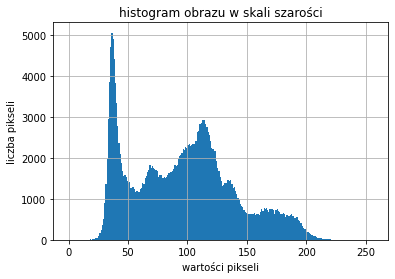

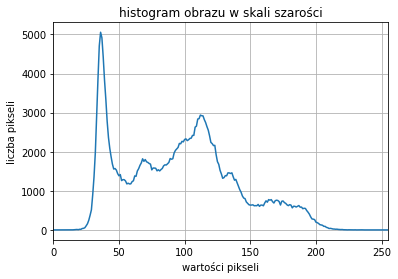

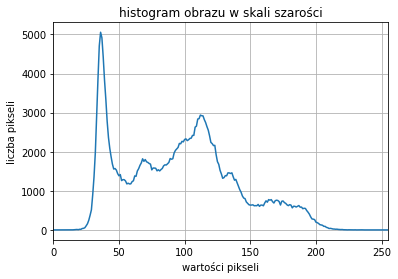

In [ ]:
#HISTOGRAM


img_lena = cv2.imread('/mydrive/lena.bmp')
img_lenag = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
#cv2_imshow(img_lenag)
# histogram obeazu szarego
# wykorzystanie biblioteki matplotlib
plt.figure()
plt.hist(img_lenag.ravel(), 256, [0,256])
# opis wykresu
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
# biblioteka opencv
histlena = cv2.calcHist([img_lenag], [0], None, [256], [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(histlena)
plt.xlim([0,255])
plt.show()
# bibliotekla numpy
histlena2, bins = np.histogram(img_lenag.flatten(), 256, [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(histlena2)
plt.xlim([0,255])
plt.show()

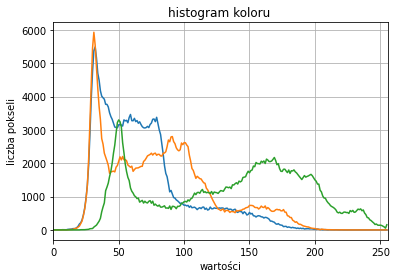

In [ ]:
# histogram dla obrazów kolorowych
chans = cv2.split(img_lena)
colors = 'b', 'g', 'r'

plt.figure() 
plt.title("histogram koloru ")
plt.xlabel("wartości")
plt.ylabel("liczba pokseli")

for (chan, color) in zip(chans, colors):
  hist = cv2.calcHist([chan], [0], None, [256], [0,256])
  plt.plot(hist)
  plt.xlim([0,256])

plt.grid(True)
plt.show()

In [ ]:
# korekcja obraz z wykorzystaniem histigramu

LookUpTable = np.zeros((256), dtype=np.uint8)

min = img_lenag.min()
max = img_lenag.max()
# print(str(min) + " " + str(max))

for i in range(256):
  LookUpTable[i] = abs((255/(max-min)) * (i-min))


img_LUT = cv2.LUT(img_lenag, LookUpTable)
#cv2_imshow(img_lenag)
#cv2_imshow(img_LUT)
res = np.hstack((img_lenag, img_LUT))
#cv2_imshow(res)

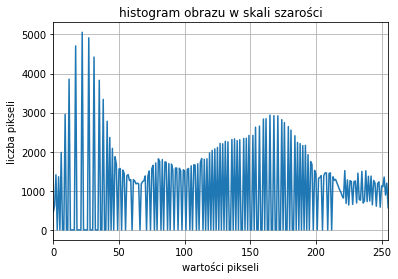

In [ ]:
# wyrównanie histogramu 
equ = cv2.equalizeHist(img_lenag)

hist = cv2.calcHist([equ], [0], None, [256], [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(hist)
plt.xlim([0,255])
plt.show()

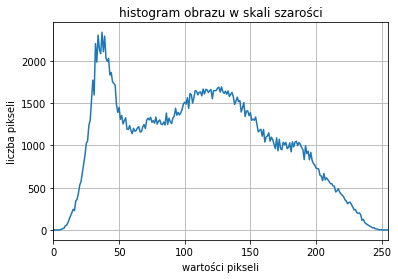

In [ ]:
# adaptacyjny histogram 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
cv2.createCLAHE
cl1 = clahe.apply(img_lenag)

hist = cv2.calcHist([cl1], [0], None, [256], [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(hist)
plt.xlim([0,255])
plt.show()

res3 = np.hstack((img_lenag, cl1))
#cv2_imshow(res3)

In [ ]:
#FILTRACJA 
#Dodawanie zakłóceń do obrazu
#szum poisson
noise_p = skimage.util.random_noise(img_lenag, mode="poisson")#w funkcji (jpg, jak chcesz rozdupcyć jpg) w tej funkcji chodzi o dodanie szumów tu tego
img_p = np.array(255*noise_p, dtype=np.uint8) #robisz tu macierz zeby kumputra sobie coś liczył
img_add = np.hstack([img_lenag, img_p]) #dodajesz se 2 macierze w jedno i wychodzi piękny rozdupcony obraz, dzięki temu mozemy pokazać 2 obrazy obok siebie
#cv2_imshow(img_add)
#print('poisson')
#print('\n')
#szum salt and peper
noise_sp = skimage.util.random_noise(img_lenag, mode="s&p")#przykłady mode= gaussian,localvar,poisson,salt,pepper,s&p,speckle
img_sp = np.array(255*noise_sp, dtype=np.uint8)
img_add = np.hstack([img_lenag, img_sp])
#cv2_imshow(img_add)
#print('s&p')
#print('\n')
#szum localvar
noise_lv = skimage.util.random_noise(img_lenag, mode="localvar")
img_sp = np.array(255*noise_sp, dtype=np.uint8)
img_add = np.hstack([img_lenag, img_sp])
#cv2_imshow(img_add)
#print('localvar')
#print('\n')
# szun Gaussa
noise_g = skimage.util.random_noise(img_lenag, mode="gaussian")
img_g = np.array(255*noise_g, dtype=np.uint8)
img_add = np.hstack([img_lenag, img_g])
#cv2_imshow(img_add)
#print('gaussian')
#print('\n')
# szum Speckle
noise_s = skimage.util.random_noise(img_lenag, mode="speckle")
img_s = np.array(255*noise_s, dtype=np.uint8)
img_add = np.hstack([img_lenag, img_s])
#cv2_imshow(img_add)
#print('Speckle')
#print('\n')

In [ ]:
# sposoby filtracji obrazu
# filtracja z możliwością stworzenia własnej maski 
kernel = np.ones((3,3), dtype=np.float32 ) / 9  #tu to jest meksyk ogólnie tworzysz macierz z '1' 3x3 ale se wybrac mozesz inna aby byla 2n+1 , dajesz typ na float i dzielisz
                                                #przez  ilosc elementow jak masz maske [[1,1,1][1,2,1][1,1,1]] to dzielisz przez 10 tu mamy [[111][111][111]] to dzielimy przez 9
#maske można stworzyć ręcznie np:
# kernel = np.array([
#   [0, -1, 0],
#   [-1, 5, -1],
#   [0, -1, 0]])
# a=np.sum(kernel) #komenda do sumowania macierzy bez ręczego liczenia
# print(a)
img_f2d = cv2.filter2D(img_s, ddepth=-1, kernel=kernel) # w filtru dajesz (to z którego szumu chcesz zrobić filtrację, glębokość '-1' daje tą samą glębię co obraz źródłowy, kernel = jaką macierz zastosować na obrazie)
#cv2_imshow(img_f2d)
# filtracja uśredniająca 
img_blur = cv2.blur(img_s, (3,3))
#cv2_imshow(img_blur)
# filtr Gaussian 
img_gblur = cv2.GaussianBlur(img_s, (3,3), 0)#tym niższa maska tym bardziej dokładna filtracja
#cv2_imshow(img_gblur)
# filtracja medianowa
img_mblur = cv2.medianBlur(img_s, 3)
#cv2_imshow(img_mblur)
# filtr bilateral 
img_bf = cv2.bilateralFilter(img_s, 3, 80, 85)
#Filtr sigma w przestrzeni kolorów. Większa wartość parametru oznacza, że ​​dalsze kolory w sąsiedztwie piksela (patrz sigmaSpace) zostaną zmieszane, co spowoduje powstanie większych obszarów o częściowo równych kolorach.
#Filtr sigma w przestrzeni współrzędnych. Większa wartość parametru oznacza, że ​​dalsze piksele będą oddziaływać na siebie, o ile ich kolory są wystarczająco zbliżone
#cv2_imshow(img_bf)

In [ ]:
#Filtracja wyostrająca oraz pozyskanie krawędzi z obrazu

#wyostrzenie obrazu 
#najpierw tworzymy maske tu tego nizej będą jakie i co po co i co i jak i gdzie i jak i o jakiej porze i kedy btw Polska wygrala z Arabią 2-0 dzięki czemu zajmują 1 miejsce w grupie xD 
mask1 = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]])

mask2 = np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]])

img_a = cv2.filter2D(img_bf, cv2.CV_64F, kernel=mask1) #ten 2 parametr idk zapisz go i tyle
#cv2_imshow(img_a)
# operator Robert's
roberts_mask1 = np.array([ [-1,1,0], 
                         [0,0,0],
                         [0,0,0] ] )

roberts_mask2 = np.array([ [1,0,0], 
                          [-1,0,0],
                          [0,0,0] ] )
img_roberts = cv2.filter2D(img_bf, cv2.CV_64F, kernel=roberts_mask1)
#cv2_imshow(img_roberts)
# operator prewitt-a
prewitt_mask1 = np.array([ [-1,-1,-1], 
                         [0,0,0],
                         [1,1,1] ] )

prewitt_mask2 = np.array([ [-1,0,1], 
                         [-1,0,1],
                         [-1,0,1] ] )
img_prewitt = cv2.filter2D(img_bf, cv2.CV_64F, kernel=prewitt_mask1)
#cv2_imshow(img_prewitt)
# filtracja Sobel
img_s = cv2.Sobel(img_bf, cv2.CV_64F, 1,1,)
#cv2_imshow(img_s)
# Filtracja Laplacian
img_lap = cv2.Laplacian(img_bf, cv2.CV_64F, ksize=3)
#cv2_imshow(img_lap)
# filtr Canny
res, thresh = cv2.threshold(img_bf, 0, 255, cv2.THRESH_OTSU)
print(res)
img_c = cv2.Canny(img_bf, res-20, res+20)#(jpg,Dolna wartość progowa,Górna wartość progowa)
#cv2_imshow(img_c)

93.0


In [ ]:
prewitt_mask2a = np.array([[0, 1,  2, 2, 2], 
                           [-1,0,  1, 1, 2],
                           [-2,-1, 0, 1, 2],
                           [-2,-1,-1, 0, 1],
                           [-2,-2,-2,-1, 0]]) # 45° 
img_previwo2 = cv2.filter2D(img_bf,cv2.CV_64F,prewitt_mask2a)
#cv2_imshow(img_previwo2)

prew_mas = np.array([[0, 1, 1],
                     [-1,0, 1],
                     [-1,-1,0]]) # 45°
img_prew_mas = cv2.filter2D(img_bf,cv2.CV_64F,kernel = prew_mas )
#cv2_imshow(img_prew_mas)  

prewitt_maska135 = np.array ([[2, 2, 2, 1,  0], 
                             [2, 1, 1, 0, -1],
                             [2, 1, 0,-1, -2],
                             [1, 0,-1,-1, -2],   
                             [0,-1,-2,-2, -2]]) #135°
img_prew135 = cv2.filter2D(img_bf,cv2.CV_64F, kernel = prewitt_maska135)
#cv2_imshow(img_prew135)
  

**Dobra tu będzie kongo z filtracją**

> Blok z wcięciem




In [ ]:
# Filtr jednorodny
# ([[1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1]])/25 to byśmy dzielili na 25

#  ([[0,1,1,1,0],
#  [1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1],
#  [1,1,1,1,1], #mozna nazwac kolowym
#  [0,1,1,1,0]])/21 to byśmy dzielili na 21
# Filtr trójkątny
# ([[1,2,3,2,1],
#   [2,4,6,4,2],
#   [3,6,9,6,3],
#   [2,4,6,4,2],
#   [1,2,3,2,1]]) / 81

#   ([[0,0,1,0,0],
#     [0,2,2,2,0],
#     [1,2,5,2,1],
#     [0,2,2,2,0],
#     [0,0,1,0,0]]) / 25 #mozna nazwac stożkowym
# Filtr Prewitta
# [h(y)] = ([[1,1,1], #masz tu se os Y wiec masz filtracje pozioma
#            [0,0,0],
#            [-1,-1,-1]])
# [h(x)] = ([[1,0,-1], # a tu masz oś X wiec filtracja pionowa (dla mułów z matmy)
#            [1,0,-1],
#            [1,0,-1]])
        # ([[-1,1,0], 
        #   [0,0,0],
        #   [0,0,0] ] ) #pozioma 

        #  ([[1,0,0], 
        #    [-1,0,0],
        #    [0,0,0] ] ) #pionowa

        #  ([[-1,0,0], 
        #    [0,1,0],
        #    [0,1,0] ] ) #ukośny
        
        #  ([[0,0,-1], 
        #    [0,1,0],
        #    [0,0,0] ] ) #ukośny
        #    #reszta tu bo mi sie pisac nei che wszystkeigo xD 
        #    #http://www.algorytm.org/przetwarzanie-obrazow/filtrowanie-obrazow.html
#Marski do Prewitta
# Przykłady masek dla kątów 0°, 45°, 90° i 135°.
#([[-1,0,1],
#  [-1,0,1],
#  [-1,0,1]]) # 0°

#([[0, 1, 1],
#  [-1,0, 1],
#  [-1,-1,0]]) # 45°

# ([[1, 1, 1], 
#   [0, 0, 0],
#   [-1,-1,-1]]) # 90°

#([[1, 1,  0],
#  [1, 0, -1],
#  [0,-1, -1]]) # 135°

#Maska Prewitta 5 x 5
# ([[-2,-1, 0, 1, 2], 
#   [-2,-1, 0, 1, 2],
#   [-2,-1, 0, 1, 2],
#   [-2,-1, 0, 1, 2],
#   [-2,-1, 0, 1, 2]]) # 0°

      # ([[-1,0, 1, 2, 2], 
      #   [-2,0, 1, 1, 2],
      #   [-2,-1, 0, 1, 2],
      #   [-2,-1, -1, 0, 2],
      #   [-2,-2, -1, 0, -1]]) # wu wychodzi kongo 

# ([[0, 1,  2, 2, 2], 
#   [-1,0,  1, 1, 2],
#   [-2,-1, 0, 1, 2],
#   [-2,-1,-1, 0, 1],
#   [-2,-2,-2,-1, 0]]) # 45° ten jest popranwy 

# ([[2, 2, 2, 2, 2], 
#   [1, 1, 1, 1, 1],
#   [0, 0, 0, 0, 0],
#   [-1,-1,-1,-1,-1],
#   [-2,-2,-2,-2,-2]]) # 90° 

# ([[2, 2, 2, 1,  0], 
#   [2, 1, 1, 0, -1],
#   [2, 1, 0,-1, -2],
#   [1, 0,-1,-1, -2],
#   [0,-1,-2,-2, -2]]) # 135°
  
  # for i in range(36):
#     print(f'Zakres od {5*i} do {5*i+5}')
#     colorLow = (5*i,0,0)
#     colorUp = (5*i+5,255,255)
#     mask2115 = cv2.inRange(hsv_img, colorLow, colorUp)
#     result = cv2.bitwise_and(img, img, mask=mask)
#for do sprawdzenia wartosci na histogramie jaki kolor za co es

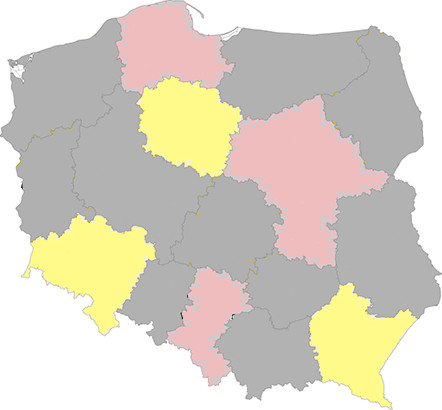

In [ ]:
mapa = cv2.imread('/mydrive/jpg/mapa.jpg')
hsv = cv2.cvtColor(mapa, cv2.COLOR_BGR2HSV)
orangeL = np.array([25,0,0])
orangeU = np.array([30,255,255])
mask0 = cv2.inRange(hsv, orangeL, orangeU)
pinkL = np.array([170,0,0])
pinkU = np.array([180,255,255])
mask1 = cv2.inRange(hsv, pinkL, pinkU)
img_add = cv2.add(mask1,mask0)
im_gray = cv2.cvtColor(mapa, cv2.COLOR_BGR2GRAY)
im_gray2=cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)
mask=cv2.bitwise_not(img_add)
im_gray2=cv2.bitwise_not(im_gray2)
compl = cv2.bitwise_not(im_gray2, mapa,  mask=mask)
cv2_imshow(compl)


(550, 800, 3)


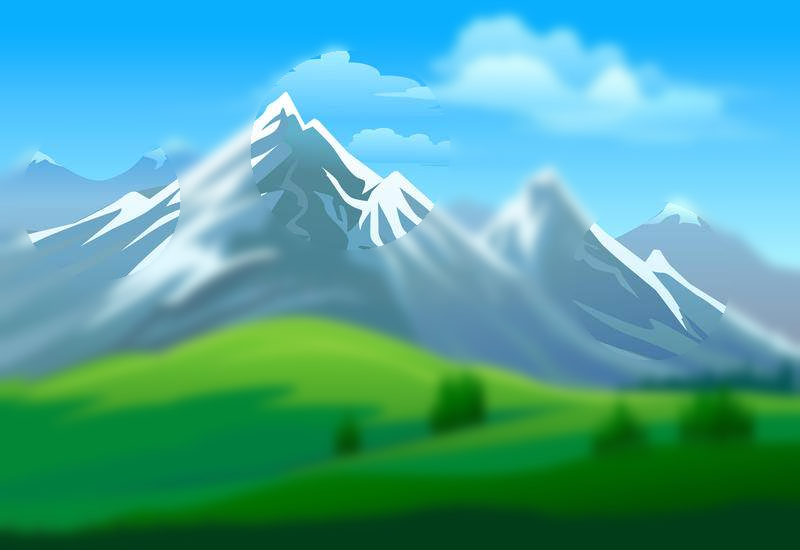

In [ ]:
gora = cv2.imread('/mydrive/jpg/gora.jpg')
#cv2_imshow(gora)
print(gora.shape)

def zadla(img,circles):
  rows, cols, mesisresi = gora.shape 
  mask = np.zeros((rows,cols),dtype=np.uint8)
  for circle in circles:
    centrum, promien = circle
    x,y = centrum
    cv2.circle(mask, (x,y), promien,255,-1)
  siuu = cv2.bitwise_not(mask)
  blur = cv2.GaussianBlur(img, (35,35),0)
  blur_mask = cv2.bitwise_and(blur,blur,mask=siuu)
  img_mask = cv2.bitwise_and(img,img,mask=mask)
  return cv2.add(blur_mask,img_mask)
  
cv2_imshow(zadla(gora,[((350,150),100),((100,200),80),((650,280),80)]))
#implementacja kodu es

In [ ]:
# Napisz funkcję, która wykona filtrację operatorem Prewitt dla dwóch
# dowolnych kierunków (skos) z maską 5x5, a następnie połącz dwa
# wyniki w jeden obraz. 
img = cv2.imread('/mydrive/jpg/la.jpg')
#cv2_imshow(img)
def fun(img):
  img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #cv2_imshow(img_g)
  prewitt_mask1 = np.array([[0, 1,  2, 2, 2], 
                            [-1,0,  1, 1, 2],
                            [-2,-1, 0, 1, 2],
                            [-2,-1,-1, 0, 1],
                            [-2,-2,-2,-1, 0]]) #45
  img_previwo2 = cv2.filter2D(img_g,cv2.CV_64F,prewitt_mask1)

  prewitt_maska135 = np.array ([[2, 2, 2, 1,  0], 
                              [2, 1, 1, 0, -1],
                              [2, 1, 0,-1, -2],
                              [1, 0,-1,-1, -2],   
                              [0,-1,-2,-2, -2]]) #135°
  img_prew135 = cv2.filter2D(img_g,cv2.CV_64F, kernel = prewitt_maska135)

  #cv2_imshow(img_previwo2)
  #cv2_imshow(img_prew135)
  img_add = cv2.add(img_previwo2,img_prew135)
  return cv2_imshow(img_add)
fun(img)